In [2]:
!pip install nba_api

In [3]:
!pip install pandas
!pip install matplotlib

In [4]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict    

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.static import teams

In [16]:
nba_teams = teams.get_teams()
nba_teams[0:10]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

In [17]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [21]:
df_Cavaliers=df_teams[df_teams['nickname']=='Cavaliers']
df_Cavaliers

,id,full_name,abbreviation,nickname,city,state,year_founded
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970


In [22]:
id_Cavaliers=df_Cavaliers[['id']].values[0][0]
id_Cavaliers

1610612739

In [23]:
from nba_api.stats.endpoints import leaguegamefinder

In [26]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_Cavaliers)

In [27]:
gamefinder.get_json();

In [28]:
games = gamefinder.get_data_frames()[0]

In [30]:
games.head(10)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612739,CLE,Cleveland Cavaliers,0022000093,2021-01-04,CLE @ ORL,L,241,83,...,0.583,10,26,36,20,12,4,14,14,-20.8
1,22020,1610612739,CLE,Cleveland Cavaliers,0022000083,2021-01-02,CLE @ ATL,W,240,96,...,0.765,15,31,46,19,10,2,15,21,2.2
2,22020,1610612739,CLE,Cleveland Cavaliers,0022000062,2020-12-31,CLE @ IND,L,239,99,...,0.542,11,32,43,22,5,6,18,22,-20.0
3,22020,1610612739,CLE,Cleveland Cavaliers,0022000046,2020-12-29,CLE vs. NYK,L,240,86,...,0.682,14,29,43,22,13,10,13,17,-9.0
4,22020,1610612739,CLE,Cleveland Cavaliers,0022000035,2020-12-27,CLE vs. PHI,W,240,118,...,0.813,11,34,45,31,13,6,16,22,24.0
5,22020,1610612739,CLE,Cleveland Cavaliers,0022000023,2020-12-26,CLE @ DET,W,291,128,...,0.633,7,44,51,29,13,4,18,24,9.0
6,22020,1610612739,CLE,Cleveland Cavaliers,0022000010,2020-12-23,CLE vs. CHA,W,241,121,...,0.750,10,40,50,34,12,3,18,22,7.0
7,12020,1610612739,CLE,Cleveland Cavaliers,0012000042,2020-12-18,CLE @ NYK,L,240,83,...,0.611,6,29,35,20,5,5,21,31,-42.4
8,12020,1610612739,CLE,Cleveland Cavaliers,0012000028,2020-12-16,CLE @ NYK,L,240,93,...,0.778,12,32,44,23,7,6,22,22,0.2
9,12020,1610612739,CLE,Cleveland Cavaliers,0012000019,2020-12-14,CLE vs. IND,W,240,116,...,0.811,10,42,52,24,8,5,23,25,9.8


In [35]:
Home_vs_NYK = games[games['MATCHUP'] == 'CLE vs. NYK']

In [36]:
Away_vs_NYK = games[games['MATCHUP'] == 'CLE @ NYK']

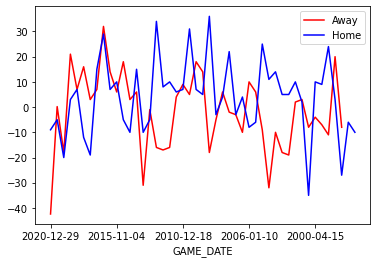

In [38]:
fig, ax = plt.subplots()

Away_vs_NYK.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax, color='red')
Home_vs_NYK.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax, color='blue')
ax.legend(["Away", "Home"])
plt.show()

In [39]:
Home_vs_NYK.mean()['PTS']

Away_vs_NYK.mean()['PLUS_MINUS']

-1.6711111111111108